In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.5/877.5 kB 29.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO  # Import the YOLO class
import ultralytics
ultralytics.checks()  # Check for updates and dependencies

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [ ]:
# Load the YOLOv8 model (you can choose from 'yolov8n.pt', 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt', 'yolov8x.pt')
model = YOLO('yolov8n.pt')  # Load the small YOLOv8 model
model# Print the version of YOLO

100%|██████████| 6.25M/6.25M [00:00<00:00, 79.8MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Train the YOLOv8 model on your custom dataset
results = model.train(
    data='/content/drive/MyDrive/dataset_new_1/dataset_new.yaml',  # Path to your dataset YAML file
    epochs=20,                        # Number of epochs to train
    imgsz=640,                         # Image size (YOLOv8 default is 640x640)
    batch=16,                          # Batch size (adjust based on GPU memory)
    name='eye_detection_finetuned',    # Name for the run
    workers=2                          # Number of data-loading threads
)

# Print results to check the progress
print(results)


Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/dataset_new_1/dataset_new.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=eye_detection_finetuned, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 100MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/dataset_new_1/Train/labels.cache... 1234 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1234/1234 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/dataset_new_1/Test/labels.cache... 218 images, 0 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]


Plotting labels to runs/detect/eye_detection_finetuned/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/eye_detection_finetuned
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       2.2G     0.9855      1.834      1.545          8        640: 100%|██████████| 78/78 [04:44<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        218        218      0.961      0.934      0.983      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.19G      0.931      1.124      1.466          4        640: 100%|██████████| 78/78 [00:30<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        218        218      0.935      0.959       0.98      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.19G     0.9331     0.9543      1.454          5        640: 100%|██████████| 78/78 [00:28<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        218        218      0.818      0.849      0.906      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.18G     0.9148     0.8525      1.441          8        640: 100%|██████████| 78/78 [00:32<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        218        218      0.904      0.899      0.932       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.19G     0.8898     0.7811      1.422          6        640: 100%|██████████| 78/78 [00:31<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]

                   all        218        218      0.982      0.985      0.994      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.18G     0.8811     0.7352      1.423          5        640: 100%|██████████| 78/78 [00:31<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        218        218      0.989      0.996      0.993      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.19G     0.8562     0.6898      1.396          8        640: 100%|██████████| 78/78 [00:30<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        218        218      0.996      0.999      0.995      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.17G     0.8429     0.6395      1.383          4        640: 100%|██████████| 78/78 [00:27<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        218        218      0.998      0.989      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.19G     0.8709     0.6309      1.409          3        640: 100%|██████████| 78/78 [00:28<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]

                   all        218        218      0.978      0.995      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.17G     0.8436     0.6252      1.387          5        640: 100%|██████████| 78/78 [00:31<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        218        218      0.993          1      0.995      0.791


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.19G     0.7001     0.4511      1.504          2        640: 100%|██████████| 78/78 [00:35<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        218        218      0.997          1      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.17G     0.6698      0.376       1.47          2        640: 100%|██████████| 78/78 [00:28<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        218        218      0.989      0.995      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.19G     0.6738      0.359      1.487          2        640: 100%|██████████| 78/78 [00:26<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        218        218      0.998          1      0.995      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.17G     0.6515     0.3389      1.453          2        640: 100%|██████████| 78/78 [00:29<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        218        218       0.97      0.988      0.994      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.19G     0.6469     0.3263      1.456          2        640: 100%|██████████| 78/78 [00:30<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        218        218      0.994      0.995      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.17G     0.6438     0.3155      1.455          2        640: 100%|██████████| 78/78 [00:26<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        218        218      0.994      0.995      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.19G     0.6339     0.3029      1.432          2        640: 100%|██████████| 78/78 [00:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        218        218      0.999      0.999      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.17G       0.63     0.2902      1.419          2        640: 100%|██████████| 78/78 [00:34<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        218        218      0.988      0.995      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.19G     0.6047     0.2821      1.421          2        640: 100%|██████████| 78/78 [00:28<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        218        218      0.998      0.997      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.17G      0.602     0.3012        1.4          2        640: 100%|██████████| 78/78 [00:27<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]


                   all        218        218      0.994          1      0.995      0.821

20 epochs completed in 0.263 hours.
Optimizer stripped from runs/detect/eye_detection_finetuned/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/eye_detection_finetuned/weights/best.pt, 6.2MB

Validating runs/detect/eye_detection_finetuned/weights/best.pt...
Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


                   all        218        218      0.994          1      0.995      0.821
             Open Eyes        109        109          1      0.999      0.995       0.82
           Closed Eyes        109        109      0.987          1      0.995      0.821
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/eye_detection_finetuned


lr/pg0,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg1,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
lr/pg2,▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
metrics/mAP50(B),▇▇▁▃████████████████
metrics/mAP50-95(B),▅▅▁▃▅▅▆▇▇▇▇▆▇▇██████
metrics/precision(B),▇▆▁▄▇███▇████▇██████
metrics/recall(B),▅▆▁▃▇██▇█████▇██████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▇▇▆▆▆▅▆▅▃▂▂▂▂▂▂▂▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78ed5e8fb4f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
import shutil

shutil.copy('/content/runs/detect/eye_detection_finetuned/weights/best.pt',
             '/content/drive/MyDrive/dataset_new_1/small.pt')

print("Model weights saved to Google Drive.")


Model weights saved to Google Drive.



0: 480x640 1 Open Eyes, 148.5ms
Speed: 4.7ms preprocess, 148.5ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)


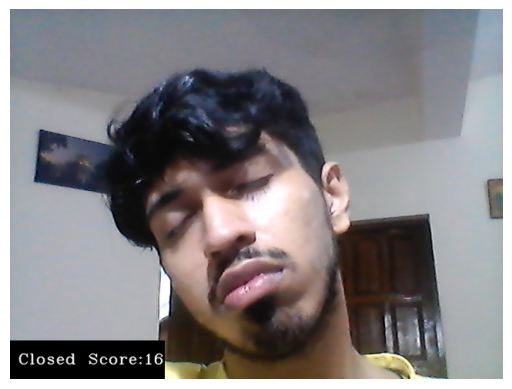

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/dataset_new_1/best.pt')

image_path = '/content/image.jpg'
image = cv2.imread(image_path)

results = model.predict(image)

# Process results and draw bounding boxes
for detection in results[0].boxes.data:  # Loop through detections, access data from boxes object
    x1, y1, x2, y2, conf, cls = detection  # Unpack the detection
    if conf > 0.5:  # Confidence threshold
        label = model.names[int(cls)]  # Get class label
        # Draw bounding box and label on the image
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(image, f'{label} {conf:.2f}', (int(x1), int(y1) - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Convert BGR image to RGB for displaying
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the result using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the saved YOLOv8 model
model = YOLO('/content/drive/MyDrive/dataset_new_1/best.pt')  # Load the model from your saved path
# Load an image to test (update with the path to your test image)
image_path = '/content/IMG_20241021_092617.jpg'  # Change this to the path of your image
image = cv2.imread(image_path)  # Read the image

# Make predictions using the loaded model
# Use the predict method for inference
results = model.predict(image)

# Process results and draw bounding boxes
for detection in results[0].boxes.data:  # Loop through detections, access data from boxes object
    x1, y1, x2, y2, conf, cls = detection  # Unpack the detection
    if conf > 0.5:  # Confidence threshold
        label = model.names[int(cls)]  # Get class label
        # Draw bounding box and label on the image
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(image, f'{label} {conf:.2f}', (int(x1), int(y1) - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Convert BGR image to RGB for displaying
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the result using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()